In [90]:
import argparse
import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.ticker import MaxNLocator

In [8]:
bd1 = 40
bd2 = 160
latency = 200
oracles = {}

In [4]:
oracle_files = open('experiments/test/fct.txt', 'r').readlines()
for i in range(len(oracle_files)-1):
    tokens1 = oracle_files[i].split()
    tokens2 = oracle_files[i+1].split()
    oracles[tokens1[4]]=[int(tokens1[6]),int(tokens2[6])]

In [3]:
def ipToNode(ip):
    return (int(ip, 16)-int('0b000001', 16))/int('00000100', 16)


# i,j are hex ip, size is in bytes
def oracle(i, j, size):
#     if ipToNode(i)/16 == ipToNode(j)/16:
#         return oracles[size][1]
#     return oracles[size][0]
    size = int(size)*8
    if ipToNode(i)/16 == ipToNode(j)/16:
        return size/bd1+latency*2
    return size/bd1+latency*4

In [4]:
def slowdown(f,dx):
    slowdowns = []
    with open(f, 'r') as f:
        for line in f.readlines():
            tokens = line.split()
            slowdowns.append(
                int(tokens[6])/oracle(tokens[0], tokens[1], tokens[4]))
    slowdowns = np.array(slowdowns)
    slowdowns.sort()
    s = 0
    i = 0
    dx = 0.001
    X = np.arange(1, 100, dx)
    Y = []
    for s in X:
        while i < len(slowdowns) and slowdowns[i] < s:
            i += 1
        Y.append(i)
    Y = np.array(Y)
    Y = Y/len(slowdowns)
    return slowdowns,Y

In [12]:
ccs = ['hpcc','timely','dcqcn','dctcp']

In [26]:
def visualize(experiment, dx=0.001):
    slowdowns = []
    cdfs = []
    for cc in ccs:
        result = slowdown("../experiments/{0}/{1}/fct.txt".format(experiment,cc), dx)
        slowdowns.append(result[0])
        cdfs.append(result[1])
    for i in range(len(experiments)):
        mean = np.mean(slowdowns[i])
        median = np.median(slowdowns[i])
        nn = slowdowns[i][int(len(slowdowns[i])*.99)]
        print("{0}: mean: {1}, median: {2}, 99%: {3}".format(experiments[i],mean,median,nn))
        X = np.arange(1, 100, dx)
    for cdf in cdfs:
        pyplot.plot(X, cdf)
    pyplot.xscale('log')
    pyplot.legend(experiments, loc='lower right')
    pyplot.xlabel('log slowdown')
    pyplot.ylabel('cdf')
    pyplot.show()

hpcc: mean: 3.7701870219439977, median: 2.8064285714285715, 99%: 19.791564885496182
timely: mean: 28.92638458133612, median: 5.224444444444444, 99%: 287.377
dcqcn: mean: 21.78797048625077, median: 4.815749480843975, 99%: 164.2
dctcp: mean: 4.929553528084741, median: 3.302336879432624, 99%: 19.786


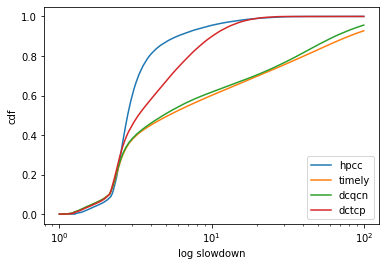

In [24]:
visualize('aditya')

hpcc: mean: 3.57786765723321, median: 2.816, 99%: 16.696795366795367
timely: mean: 18.721534678466114, median: 4.139765342960289, 99%: 157.006
dcqcn: mean: 17.476124975799152, median: 4.071917420814479, 99%: 132.549
dctcp: mean: 4.894104356063847, median: 3.287, 99%: 19.784


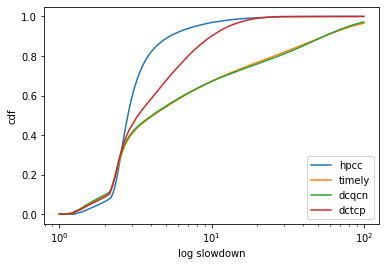

In [27]:
visualize('facebook')

In [36]:
def slowdownBySize(f):
    slowdowns = {}
    with open(f, 'r') as f:
        for line in f.readlines():
            tokens = line.split()
            size = int(tokens[4])
            if size not in slowdowns:
                slowdowns[size] = []
            slowdowns[int(tokens[4])].append(int(tokens[6])/oracle(tokens[0], tokens[1], tokens[4]))
    slowdownsm = {}
    for size in slowdowns:
        slowdownsm[size] = np.mean(slowdowns[size])
    lists = sorted(slowdownsm.items())
    return lists

In [99]:
def sdvssize(experiment,max_size):
    slowdowns = []
    for cc in ccs:
        result = slowdownBySize("../experiments/{0}/{1}/fct.txt".format(experiment,cc))
        slowdowns.append(result)
    for slowdown in slowdowns:
        x, y = zip(*slowdown)
        pyplot.plot(x,gaussian_filter1d(y, sigma=50))
    pyplot.xscale('log')
    pyplot.yscale('log')
    pyplot.legend(experiments, loc='upper left')
    pyplot.xlabel('flow size')
    pyplot.ylabel('log slowdown')
    pyplot.xticks(np.array([1000,10000,100000,1000000,max_size]), ('1K', '10K', '100K', '1M', str(int(max_size/1000000))+'M'))
    pyplot.show()

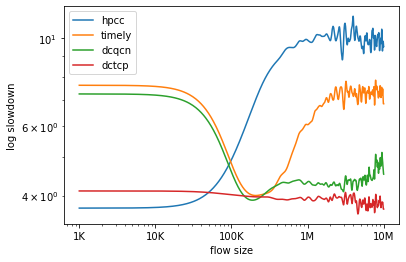

In [100]:
sdvssize('facebook',10000000)

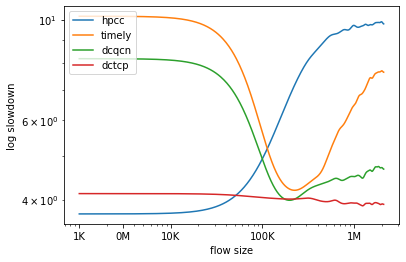

In [101]:
sdvssize('aditya',3000)